<a href="https://colab.research.google.com/github/girishthorat/Generative-Models/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0910
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0910
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0909
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0918 - val_lo

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

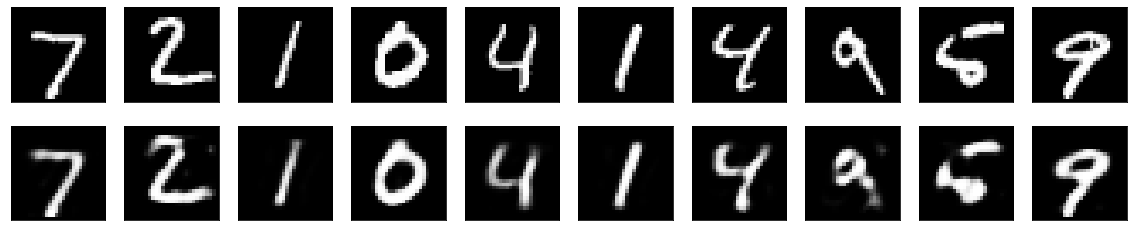

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2261 - val_loss: 0.1448
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1349 - val_loss: 0.1262
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1229 - val_loss: 0.1182
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1169 - val_loss: 0.1136
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1129 - val_loss: 0.1101
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1100 - val_loss: 0.1075
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1078 - val_loss: 0.1061
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1059 - val_loss: 0.1042
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1045 - val_loss: 0.1029
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1033 - val_lo

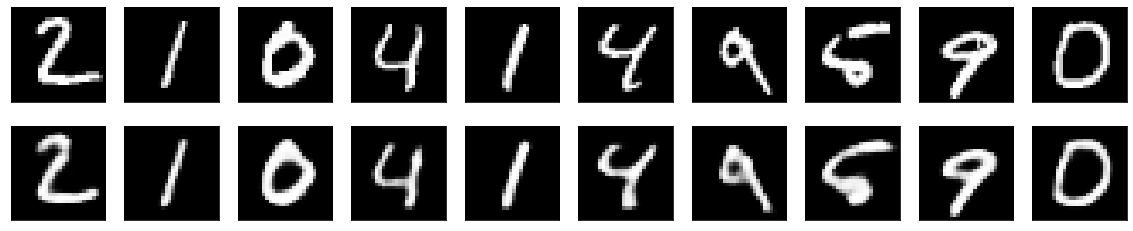

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()